In [1]:
import numpy as np;import pandas as pd;import matplotlib.pyplot as plt;
from sklearn.datasets import load_iris
iris=load_iris()
X=iris.data[:,[2,3]]
y=iris.target

In [2]:

np.random.seed(2042)
                     

## La siguiente función cumple una función similar a train_test_split() de Scikit-learn

In [3]:

def train_test_split2_0(X,y,tamanio_test=0.2,tamanio_vali=0.2):
    tamanio_set=len(X)
    tamanio_test=int(tamanio_set*tamanio_test)
    tamanio_vali=int(tamanio_set*tamanio_vali)
    tamanio_train=tamanio_set-tamanio_test-tamanio_vali
    
    randonm_indices=np.random.permutation(tamanio_set)
    
    X_train=X[randonm_indices[:tamanio_train]]
    y_train=y[randonm_indices[:tamanio_train]]
    X_vali=X[randonm_indices[tamanio_train:-tamanio_test]]
    y_vali=y[randonm_indices[tamanio_train:-tamanio_test]]
    X_test=X[randonm_indices[-tamanio_test:]]
    y_test=y[randonm_indices[-tamanio_test:]]
    
    return X_train,y_train,X_vali,y_vali,X_test,y_test


  
    

In [4]:
X_train,y_train,X_vali,y_vali,X_test,y_test=train_test_split2_0(X,y)


$\sigma\left(\mathbf{s}(\mathbf{x})\right)_k = \dfrac{\exp\left(s_k(\mathbf{x})\right)}{\sum\limits_{j=1}^{K}{\exp\left(s_j(\mathbf{x})\right)}}$



### El algoritmo SoftMax fue implementado from scratch en el archivo SoftMaxClassifier

In [5]:
from SoftMaxClassifier import SFT

modelo=SFT(random_state=2042,eta=0.1)

modelo.fit(X_train,y_train)

In [6]:
y_pred=modelo.predict(X_vali)

In [7]:
np.mean(y_vali==y_pred)

1.0

In [8]:
y_pred=modelo.predict(X_test)
np.mean(y_test==y_pred)

0.9333333333333333

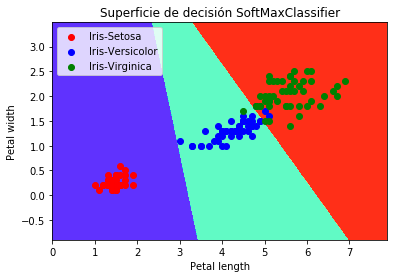

In [9]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),np.arange(y_min, y_max, 0.01))
Z = modelo.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap='rainbow')
plt.scatter(X[y==0,0],X[y==0,1],c='red',label='Iris-Setosa')
plt.scatter(X[y==1,0],X[y==1,1],c='blue',label='Iris-Versicolor')
plt.scatter(X[y==2,0],X[y==2,1],c='green',label='Iris-Virginica')
plt.title("Superficie de decisión SoftMaxClassifier")
plt.xlabel('Petal length');plt.ylabel('Petal width')
plt.axis('tight')
plt.legend()

#### En general el algoritmo construido desde cero presenta un buen rendimiento como se puede observar en la superficie de decisión. El rendimiento se puede mejorar controlando el parámetro de regularización o modificando la tasa de aprendizaje.